<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/breast_cancer.csv")
df = df.drop("id", axis =1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
x = df.drop("diagnosis", axis =1)
y = df["diagnosis"]

In [12]:
labelEncoder = LabelEncoder()
y=labelEncoder.fit_transform(y)


In [16]:
standard = StandardScaler()
x = standard.fit_transform(x)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [20]:
accuracy = naive_bayes.score(x_test,y_test)
print("accuracy", accuracy)

accuracy 0.9649122807017544


In [22]:
y_predict = naive_bayes.predict(x_test)

cm = confusion_matrix(y_test, y_predict)

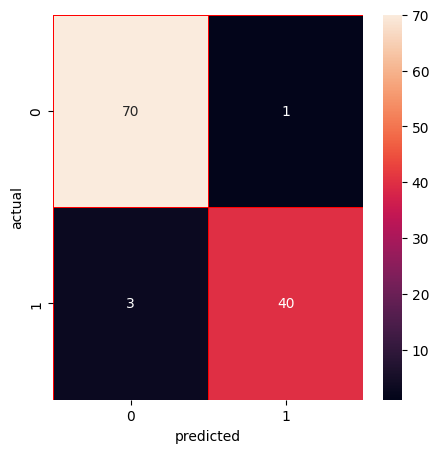

In [26]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt="d", ax=ax)

plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()